In [1]:
import numpy as np
import pandas as pd

In [6]:
df_test = pd.read_csv('test.csv', header=0)
df_train = pd.read_csv('train.csv', header=0)

In [7]:
#Cantidad de datos
print('Cantidad de datos:')
print(df_train.shape)
print(df_test.shape)

Cantidad de datos:
(891, 12)
(418, 11)


In [8]:
#Tipo de dato
print('Tipos de datos:')
print(df_train.info())
print(df_test.info())

Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare        

In [9]:
#datos faltantes
print('Datos faltantes:')

print(pd.isnull(df_test).sum())

Datos faltantes:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
#Estadisticas
print('Estadísticas del dataset:')
print(df_train.describe())
print(df_test.describe())

Estadísticas del dataset:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp 

In [11]:
#CAMBIO LOS DATOS DE Sex EN NÚMERO (Female = 0, male = 1)
df_train.loc[df_train["Sex"]=="female", "Sex"] = 0
df_train.loc[df_train["Sex"]=="male", "Sex"] = 1
df_test.loc[df_test["Sex"]=="female", "Sex"] = 0
df_test.loc[df_test["Sex"]=="male", "Sex"] = 1

In [12]:
df_test['Sex']

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64

In [13]:
#CAMBIO LOS DATOS DE Embarked EN NÚMEROS(Q = 0, S = 1, C = 2)
df_train['Embarked'].replace(['Q','S', 'C'],[0,1,2],inplace=True)
df_test['Embarked'].replace(['Q','S', 'C'],[0,1,2],inplace=True)

In [14]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,1.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,2.0


In [15]:
#REEMPLAZO LOS DATOS FALTANTES EN LA EDAD POR LA MEDIA DE ESTA COLUMNA
print(df_train["Age"].mean())
print(df_test["Age"].mean())
promedio = 30
df_train['Age'] = df_train['Age'].replace(np.nan, promedio)
df_test['Age'] = df_test['Age'].replace(np.nan, promedio)

29.69911764705882
30.272590361445783


In [16]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,30.0,1,2,W./C. 6607,23.4500,NaN,1.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,2.0


In [17]:
#grupos: 0-8 = 1, 9-15 = 2, 16-18 = 3, 19-25 = 4, 26-40 = 5, 41-60 = 6, 61-100 = 7
bins = [0, 8, 15, 18, 25, 40, 60, 100]
name = ['1','2','3','4','5','6','7']
df_test['Age'] = pd.cut(df_test['Age'], bins, labels = name)
df_train['Age'] = pd.cut(df_train['Age'], bins, labels = name)

In [18]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,5,0,0,330911,7.8292,NaN,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,6,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",1,7,0,0,240276,9.6875,NaN,0
3,895,3,"Wirz, Mr. Albert",1,5,0,0,315154,8.6625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,4,1,1,3101298,12.2875,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,5,0,0,A.5. 3236,8.0500,NaN,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,5,0,0,PC 17758,108.9000,C105,2
415,1307,3,"Saether, Mr. Simon Sivertsen",1,5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1
416,1308,3,"Ware, Mr. Frederick",1,5,0,0,359309,8.0500,NaN,1


In [19]:
#Se elimina la columna "Cabin" ya que tiene muchos datos perdidos
df_train.drop(['Cabin'], axis = 1, inplace=True)
df_test.drop(['Cabin'], axis = 1, inplace=True)

In [20]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,4,1,0,A/5 21171,7.2500,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,5,1,0,PC 17599,71.2833,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,5,0,0,STON/O2. 3101282,7.9250,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,5,1,0,113803,53.1000,1.0
4,5,0,3,"Allen, Mr. William Henry",1,5,0,0,373450,8.0500,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,5,0,0,211536,13.0000,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,4,0,0,112053,30.0000,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,5,1,2,W./C. 6607,23.4500,1.0
889,890,1,1,"Behr, Mr. Karl Howell",1,5,0,0,111369,30.0000,2.0


In [22]:
#Elimino las columnas que no son necesarias para el analisis
df_train = df_train.drop(['PassengerId','Name','Ticket'], axis=1)
df_test = df_test.drop(['Name','Ticket'], axis=1)

KeyError: "['PassengerId' 'Name' 'Ticket'] not found in axis"

In [23]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,4,1,0,7.2500,1.0
1,1,1,0,5,1,0,71.2833,2.0
2,1,3,0,5,0,0,7.9250,1.0
3,1,1,0,5,1,0,53.1000,1.0
4,0,3,1,5,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
886,0,2,1,5,0,0,13.0000,1.0
887,1,1,0,4,0,0,30.0000,1.0
888,0,3,0,5,1,2,23.4500,1.0
889,1,1,1,5,0,0,30.0000,2.0


In [24]:
#Se elimina las filas con los datos perdidos
df_train.dropna(axis=0, how='any', inplace=True)
df_test.dropna(axis=0, how='any', inplace=True)

In [25]:
print(pd.isnull(df_train).sum())
print(pd.isnull(df_test).sum())
print(df_train.shape)
print(df_test.shape)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
(889, 8)
(417, 8)


In [26]:
#Se trae la libreria Skelearn y sus modulos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#Separo la columna con la información de los sobrevivientes
X = np.array(df_train.drop(['Survived'], 1))
y = np.array(df_train['Survived'])

In [28]:
X

array([[3, 1, '4', ..., 0, 7.25, 1.0],
       [1, 0, '5', ..., 0, 71.2833, 2.0],
       [3, 0, '5', ..., 0, 7.925, 1.0],
       ...,
       [3, 0, '5', ..., 2, 23.45, 1.0],
       [1, 1, '5', ..., 0, 30.0, 2.0],
       [3, 1, '5', ..., 0, 7.75, 0.0]], dtype=object)

In [29]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_test

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0], dtype=int64)

In [31]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
print('Precisión Soporte de Vectores:')
print(svc.score(X_train, y_train))

Precisión Soporte de Vectores:
0.8677918424753868


C:\Users\crist\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [32]:
ids = df_test['PassengerId']

In [155]:
prediccion_svc = svc.predict(df_test.drop('PassengerId', axis=1))
out_svc = pd.DataFrame({ 'PassengerId' : ids, 'Survived': prediccion_svc })
print('Predicción Soporte de Vectores:')
print(out_svc.head(21))

Predicción Soporte de Vectores:
    PassengerId  Survived
0           892         0
1           893         1
2           894         0
3           895         0
4           896         1
5           897         0
6           898         1
7           899         0
8           900         1
9           901         0
10          902         0
11          903         0
12          904         1
13          905         0
14          906         0
15          907         1
16          908         0
17          909         0
18          910         1
19          911         1
20          912         1


In [37]:
import matplotlib.pyplot as plt

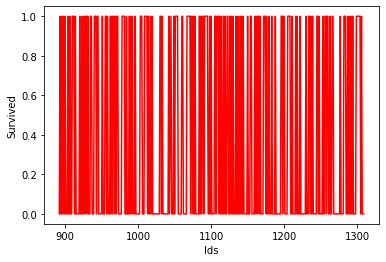

In [113]:
#Grafica
plt.plot(ids, prediccion_svc, color='red', label='linea')
plt.ylabel('Survived')
plt.xlabel('Ids')
plt.show()

In [125]:
#cantidad de datos repetidos, 0 = 255, 1= 162
val, total = np.unique(prediccion_svc, return_counts = True)

In [144]:
val, total

(array([0, 1], dtype=int64), array([255, 162], dtype=int64))

In [145]:
indice = [val[0], val[1]]
valores = [total[0], total[1]]
color = ["red","yellow"]

Text(0.5, 0, 'Indice')

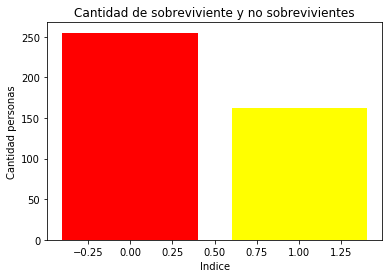

In [153]:
#Grafica cantidad de sobreviviente y no sobreviviente
plt.title("Cantidad de sobreviviente y no sobrevivientes")
plt.bar(indice, height=valores, color=color)
plt.ylabel("Cantidad personas")
plt.xlabel("Indice")